<a href="https://colab.research.google.com/github/NicoleMa1220/SEM/blob/main/Load_Specific_Dataset_and_Conduct_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Specific Dataset and Conduct Cohort Analysis**

Name: Nicole Ma

Andrew ID: rongyuem

# Pre-Assignment Exercise

**Set-up**

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install -U cellxgene-census

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.6 MB/s eta 0:00:00
  Created wheel 

In [ ]:
import cellxgene_census


**Option 2 (Recommended): Load data by directly reading the h5ad file into the AnnData objecT**

In [ ]:
!pip install scanpy


In [ ]:
import urllib
import scanpy

In [ ]:
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [ ]:
obs_attributes = adata.obs.columns.tolist()  # List of obs attributes
var_attributes = adata.var.columns.tolist()  # List of var attributes

print("Obs attributes:", obs_attributes)
print("Var attributes:", var_attributes)

Obs attributes: ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']
Var attributes: ['feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


In [ ]:
# Get gene id mapping to its name
if 'feature_name' in adata.var.columns:
    gene_ids = adata.var.index
    gene_names = adata.var['feature_name']

gene_mapping = dict(zip(gene_ids, gene_names))

print("\nMapping from gene ID to gene name (first 10 mappings):")
for gene_id, gene_name in list(gene_mapping.items())[:10]:
    print(f"Gene ID: {gene_id}, Gene Name: {gene_name}")


Mapping from gene ID to gene name (first 10 mappings):
Gene ID: ENSG00000278915, Gene Name: ENSG00000278915.1
Gene ID: ENSG00000168454, Gene Name: TXNDC2
Gene ID: ENSG00000139180, Gene Name: NDUFA9
Gene ID: ENSG00000229177, Gene Name: ENSG00000229177.1
Gene ID: ENSG00000204564, Gene Name: C6orf136
Gene ID: ENSG00000116717, Gene Name: GADD45A
Gene ID: ENSG00000254418, Gene Name: SPON1-AS1
Gene ID: ENSG00000114654, Gene Name: EFCC1
Gene ID: ENSG00000257894, Gene Name: ENSG00000257894.2
Gene ID: ENSG00000198398, Gene Name: TMEM207


In [ ]:
# Extract and display the values under each attribute in obs
for obs_attr in adata.obs.columns:
    print(f"\nValues for obs attribute '{obs_attr}':")
    print(adata.obs[obs_attr].values)

# Extract and display the values under each attribute in var
for var_attr in adata.var.columns:
    print(f"\nValues for var attribute '{var_attr}':")
    print(adata.var[var_attr].values)


Values for obs attribute 'nCount_RNA':
[ 927. 1251. 2972. ... 5511. 9837. 6275.]

Values for obs attribute 'nFeature_RNA':
[ 694  886 1695 ... 2269 3440 2510]

Values for obs attribute 'percent.mt':
[1.83387271 6.47482014 0.20188425 ... 6.06060606 3.15136729 1.56175299]

Values for obs attribute 'SORT':
['MAP2', 'MAP2', 'MAP2', 'MAP2', 'MAP2', ..., 'MAP2control', 'MAP2control', 'MAP2control', 'MAP2control', 'MAP2control']
Length: 23197
Categories (3, object): ['AT8', 'MAP2', 'MAP2control']

Values for obs attribute 'Amyloid':
['C3', 'C3', 'C3', 'C3', 'C3', ..., 'No', 'No', 'No', 'No', 'No']
Length: 23197
Categories (3, object): ['C3', 'DP (C0)', 'No']

Values for obs attribute 'Age':
['73', '73', '73', '73', '73', ..., '71', '71', '71', '71', '71']
Length: 23197
Categories (14, object): ['57', '61', '62', '66', ..., '81', '87', '89', '93']

Values for obs attribute 'RIN':
['5.7', '5.7', '5.7', '5.7', '5.7', ..., '6.5', '6.5', '6.5', '6.5', '6.5']
Length: 23197
Categories (10, object):

In [ ]:
# Filter the annData to only include female subjects for sex attribute
adata_slice_female = adata[adata.obs['sex'] == 'female', :]
print(adata_slice_female)

# Filter the annData to only include TXNDC2 and NDUFA9 genes
genes_of_interest = ['TXNDC2', 'NDUFA9']
adata_slice_genes = adata[:,adata.var['feature_name'].isin(genes_of_interest)]
print(adata_slice_genes)

View of AnnData object with n_obs × n_vars = 9525 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'
View of AnnData object with n_obs × n_vars = 23197 × 2
    obs: 'nCount_RNA', 'nFeature_RNA',

# Alzheimer's Disease - Single Soma Transcriptomics Analysis

In [ ]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import numpy as np

# Data Loading and Preprocessing

**Load the data into an AnnData object**

In [ ]:
# Step 1: Download the dataset using urllib
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

# Step 2: Load the data into an AnnData object
adata = sc.read_h5ad('dataset.h5ad')
print(f"AnnData object loaded: {adata}")

AnnData object loaded: AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [ ]:
# List of the top 11 genes with the largest effect size
top_11_genes = [
    'SLC26A3', 'RASGEF1B', 'RP11-701H24.9', 'LINGO1', 'PDE4DIP',
    'AC159540.1', 'RP11-289H16.1', 'RP11-219A15.1', 'LINC01609',
    'PHYHIP', 'RP11-745L13.2'
]

# Check which of the top 11 genes are actually present in the dataset
found_genes = adata.var['feature_name'].isin(top_11_genes)
print(f"Number of found genes: {sum(found_genes)}")
print(f"Found genes: {adata.var['feature_name'][found_genes].tolist()}")

# If some genes are missing, this will show which ones:
missing_genes = [gene for gene in top_11_genes if gene not in adata.var['feature_name'].values]
print(f"Missing genes: {missing_genes}")


Number of found genes: 6
Found genes: ['SLC26A3', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP', 'RASGEF1B']
Missing genes: ['RP11-701H24.9', 'AC159540.1', 'RP11-289H16.1', 'RP11-219A15.1', 'RP11-745L13.2']


**Hypotheses for Missing Genes:**

* Filtering in Dataset: The dataset may exclude certain genes, especially

* low-expression or non-coding genes like pseudogenes and long non-coding RNAs, for quality purposes.

* Alternative Names or Aliases: Some genes may be listed under different names or identifiers (e.g., Ensembl IDs) that don't match the dataset’s naming conventions.

* Unique Identifiers for Non-coding Genes: Missing genes, like certain non-coding RNAs, might be cataloged with varied IDs across databases, leading to inconsistencies.

* Dataset-Specific Exclusions: The dataset might prioritize specific gene types (e.g., coding regions), thus omitting genes that are less relevant to the dataset’s core focus.

In [ ]:
# Step 3: List of the top matched genes with the largest effect size
top_genes = ['SLC26A3', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP', 'RASGEF1B']

# Step 4: Filter the AnnData object to include only the top genes
adata_filtered = adata[:, adata.var['feature_name'].isin(top_genes)]
print(f"Filtered AnnData object with top genes: {adata_filtered}")

Filtered AnnData object with top genes: View of AnnData object with n_obs × n_vars = 23197 × 6
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [ ]:
adata_filtered.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000091138,False,SLC26A3,NCBITaxon:9606,gene,646,protein_coding
ENSG00000169783,False,LINGO1,NCBITaxon:9606,gene,579,protein_coding
ENSG00000178104,False,PDE4DIP,NCBITaxon:9606,gene,927,protein_coding
ENSG00000253103,False,LINC01609,NCBITaxon:9606,gene,536,lncRNA
ENSG00000168490,False,PHYHIP,NCBITaxon:9606,gene,847,protein_coding
ENSG00000138670,False,RASGEF1B,NCBITaxon:9606,gene,691,protein_coding


**Correlation Analysis:** Assess correlations among zheimer's-associated genes to identify possible co-expression

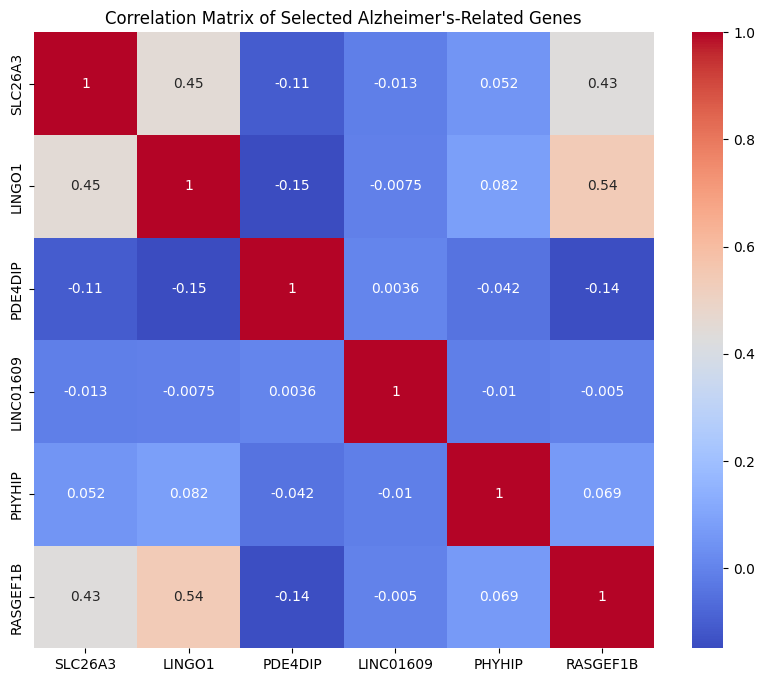

            SLC26A3    LINGO1   PDE4DIP  LINC01609    PHYHIP  RASGEF1B
SLC26A3    1.000000  0.451007 -0.108463  -0.012912  0.051628  0.431657
LINGO1     0.451007  1.000000 -0.149186  -0.007477  0.082204  0.541582
PDE4DIP   -0.108463 -0.149186  1.000000   0.003641 -0.041633 -0.142802
LINC01609 -0.012912 -0.007477  0.003641   1.000000 -0.010232 -0.005011
PHYHIP     0.051628  0.082204 -0.041633  -0.010232  1.000000  0.068865
RASGEF1B   0.431657  0.541582 -0.142802  -0.005011  0.068865  1.000000


In [42]:

# Define the top genes of interest
top_genes = ['SLC26A3', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP', 'RASGEF1B']

# Extract expression data for the top genes
# Ensure that 'adata' is sliced or contains these specific genes
gene_data = adata[:, adata.var['feature_name'].isin(top_genes)].to_df()
gene_data.columns = top_genes  # Rename columns to gene names if needed

# Compute correlation matrix
correlation_matrix = gene_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Selected Alzheimer's-Related Genes")
plt.show()

print(correlation_matrix)


**Key Observations:**
LINGO1 and RASGEF1B (0.54): This high positive correlation suggests that these two genes might have a coordinated role in AD, potentially interacting within similar pathways or regulatory mechanisms.

# Disease Cohort Comparison

**4. (20%) Experiment and find the differences between the two cohorts in disease category (purple Alzheimer subject, green normal subject).**

In [ ]:


# Step 1: Separate data by disease status
alzheimer_data = adata_filtered[adata_filtered.obs['disease'] == 'Alzheimer disease']
normal_data = adata_filtered[adata_filtered.obs['disease'] == 'normal']

# Step 2: Calculate average expression for each gene in each subset
alzheimer_avg_expr = np.mean(alzheimer_data.X.toarray(), axis=0)
normal_avg_expr = np.mean(normal_data.X.toarray(), axis=0)

# Step 3: Create a DataFrame with average expressions and calculate differences
gene_names = adata_filtered.var['feature_name'].tolist()
df_expr_comparison = pd.DataFrame({
    'Gene': gene_names,
    'Alzheimer_avg': alzheimer_avg_expr,
    'Normal_avg': normal_avg_expr
})

# Calculate the difference for the second plot
df_expr_comparison['Difference'] = df_expr_comparison['Alzheimer_avg'] - df_expr_comparison['Normal_avg']
df_expr_comparison_sorted = df_expr_comparison.sort_values(by='Difference', ascending=False)

# Select the top 10 upregulated genes in Alzheimer's for both plots
top_genes = df_expr_comparison_sorted.head(10)


        Gene  Alzheimer_avg  Normal_avg  Difference
5   RASGEF1B       2.036064    1.146390    0.889674
1     LINGO1       1.899750    1.178707    0.721043
0    SLC26A3       1.210716    0.740837    0.469879
4     PHYHIP       0.498769    0.445409    0.053360
3  LINC01609       0.021722    0.013426    0.008296
2    PDE4DIP       1.301825    1.623388   -0.321563


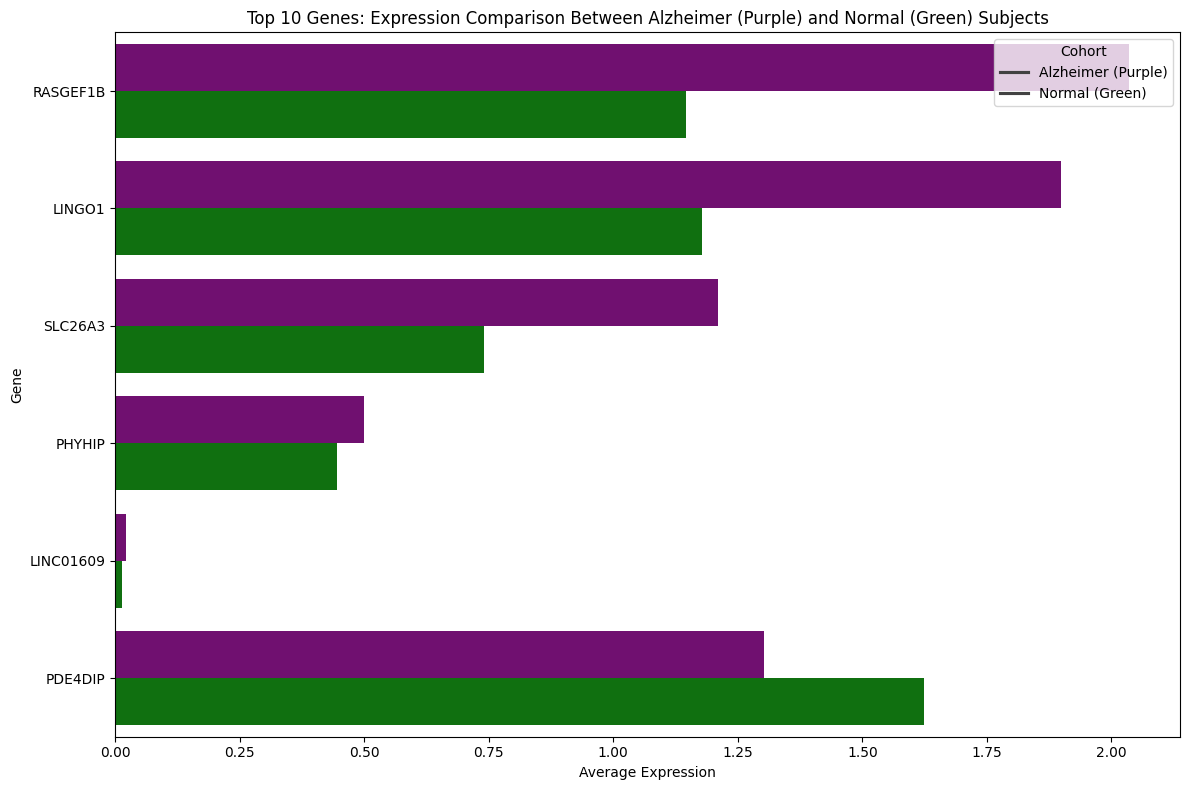

In [ ]:
# Display the table of the top genes with average expressions for Male, Female, and the Difference
top_genes_table = top_genes[['Gene', 'Alzheimer_avg', 'Normal_avg', 'Difference']]
print(top_genes_table)

# Plot 1: Side-by-Side Comparison Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=pd.melt(top_genes, id_vars="Gene", value_vars=["Alzheimer_avg", "Normal_avg"],
                 var_name="Cohort", value_name="Average Expression"),
    x="Average Expression", y="Gene", hue="Cohort", palette={"Alzheimer_avg": "purple", "Normal_avg": "green"}
)
plt.title('Top 10 Genes: Expression Comparison Between Alzheimer (Purple) and Normal (Green) Subjects')
plt.xlabel('Average Expression')
plt.ylabel('Gene')
plt.legend(title='Cohort', loc='upper right', labels=['Alzheimer (Purple)', 'Normal (Green)'])
plt.tight_layout()
plt.show()



<ipython-input-15-0032dec059f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Difference', y='Gene', data=top_genes, palette='viridis')


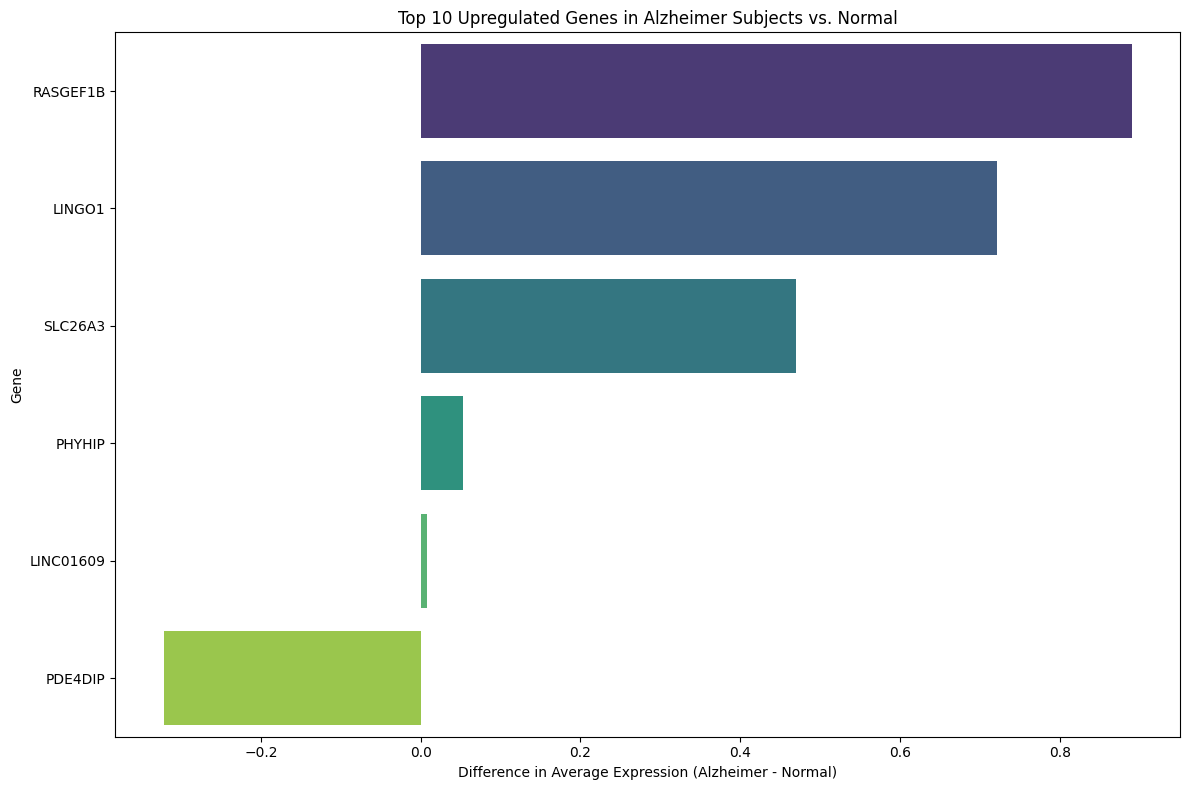

In [ ]:
# Plot 2: Difference in Expression
plt.figure(figsize=(12, 8))
sns.barplot(x='Difference', y='Gene', data=top_genes, palette='viridis')
plt.title('Top 10 Upregulated Genes in Alzheimer Subjects vs. Normal')
plt.xlabel('Difference in Average Expression (Alzheimer - Normal)')
plt.ylabel('Gene')
plt.tight_layout()
plt.show()

**Finding:**
Disease cohort comparison between Alzheimer's disease (AD) and normal subjects


**1. Upregulated Genes in Alzheimer’s Disease:**
* RASGEF1B: Shows the highest upregulation (+0.89) in Alzheimer's disease subjects. This gene is involved in cell signaling pathways, which influence neuronal growth and synaptic plasticity. Upregulation may indicate a response to neurodegeneration, attempting to support cellular signaling and adaptation processes.
* LINGO1: Exhibits a notable increase in expression (+0.72). Known for inhibiting myelination, its heightened expression could exacerbate neuronal degradation in Alzheimer’s by limiting neuronal repair.
* SLC26A3: Displays increased activity (+0.47), potentially linked to its role in ion transport, which is crucial for maintaining cellular homeostasis and may be disrupted in Alzheimer’s pathology.

**2. Downregulated Gene in Alzheimer’s Disease:**

* PDE4DIP: The only gene with decreased expression (-0.32), potentially impacting cellular structure integrity. PDE4DIP is linked to maintaining cellular frameworks, and its downregulation may reflect structural disruptions in Alzheimer’s-affected neurons.

**Analysis of PDE4DIP:** the downregulated gene in this Alzheimer’s dataset

**Functional Role of PDE4DIP:**
* PDE4DIP (Phosphodiesterase 4D Interacting Protein) plays an important role in maintaining the cellular cytoskeleton, particularly through its interaction with centrosomes and microtubules.

* Impact on Neuron Stability: Since PDE4DIP is essential for microtubule anchoring, a decrease in its expression could weaken the neuronal cytoskeleton. This may contribute to the instability seen in Alzheimer’s-affected neurons, where neurofibrillary tangles and disrupted transport mechanisms are common pathological features.

**Industry Practical Directions:**

Because microtubule instability is a key factor in Alzheimer’s progression, targeting PDE4DIP to stabilize or restore its expression could enhance cellular resilience, potentially slowing the progression of neurodegeneration.

# Age-Related Differences

**5. (20%) Experiment with subjects of different ages (57 - 89) in development_stage category.**

**Write one page about your findings, e.g. what are the differences between younger vs. older subjects.**

In [ ]:
# Get and sort unique values in 'development_stage' in order
development_stages_ordered = sorted(adata.obs['development_stage'].unique())
print("Ordered development stages:", development_stages_ordered)


Ordered development stages: ['57-year-old stage', '61-year-old stage', '62-year-old stage', '66-year-old stage', '67-year-old stage', '68-year-old stage', '71-year-old stage', '72-year-old stage', '73-year-old stage', '79-year-old stage', '80 year-old and over stage', '81-year-old stage', '87-year-old stage', '89-year-old stage']


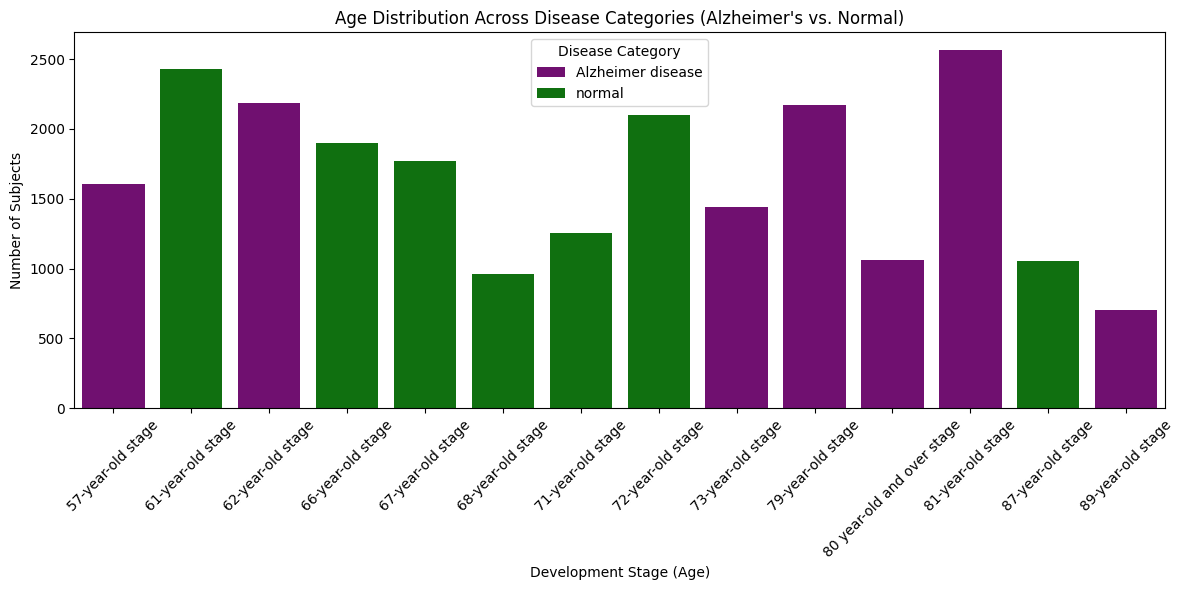

In [ ]:
# Sort the development stages alphabetically
age_order = sorted(adata.obs['development_stage'].unique())

# Plot the distribution of age (development_stage) across disease categories with alphabetically sorted x-axis
plt.figure(figsize=(12, 6))
sns.countplot(data=adata.obs, x='development_stage', hue='disease', order=age_order,
              palette={'Alzheimer disease': 'purple', 'normal': 'green'})
plt.title("Age Distribution Across Disease Categories (Alzheimer's vs. Normal)")
plt.xlabel("Development Stage (Age)")
plt.ylabel("Number of Subjects")
plt.xticks(rotation=45)
plt.legend(title="Disease Category")
plt.tight_layout()
plt.show()

In [ ]:
# Group by 'development_stage' and 'disease', count occurrences, and unstack for table format
age_disease_summary = adata.obs.groupby(['development_stage', 'disease']).size().unstack(fill_value=0)

# Add a sum row at the bottom
age_disease_summary.loc['Total'] = age_disease_summary.sum()

# Display the summary with the sum row
print("Age distribution summary across disease categories:")
display(age_disease_summary)

Age distribution summary across disease categories:


<ipython-input-27-7e65cf9af6d8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disease_summary = adata.obs.groupby(['development_stage', 'disease']).size().unstack(fill_value=0)


disease,Alzheimer disease,normal
development_stage,,
80 year-old and over stage,1061,0
57-year-old stage,1608,0
61-year-old stage,0,2429
62-year-old stage,2183,0
66-year-old stage,0,1899
67-year-old stage,0,1769
68-year-old stage,0,960
71-year-old stage,0,1254
72-year-old stage,0,2097


**Finding:** Alzheimer’s Disease (AD) counts are heavily clustered within specific age groups, while other groups contain only normal subjects. This uneven distribution is somewhat unusual, as we would typically expect to see a mix of AD and normal subjects across all age stages

In [ ]:
# Step 1: Define age groups for comparison in the development_stage category
younger_ages = [
    '57-year-old stage', '61-year-old stage', '62-year-old stage',
    '66-year-old stage', '67-year-old stage', '68-year-old stage',
    '71-year-old stage', '72-year-old stage', '73-year-old stage'
]

older_ages = [
    '79-year-old stage', '80 year-old and over stage', '81-year-old stage',
    '87-year-old stage', '89-year-old stage'
]

# Step 2: Filter data by disease and age group
# Separate by age and disease: Alzheimer's younger and older, normal younger and older
younger_AD = adata_filtered[(adata_filtered.obs['development_stage'].isin(younger_ages)) &
                            (adata_filtered.obs['disease'] == 'Alzheimer disease')]
older_AD = adata_filtered[(adata_filtered.obs['development_stage'].isin(older_ages)) &
                          (adata_filtered.obs['disease'] == 'Alzheimer disease')]
younger_normal = adata_filtered[(adata_filtered.obs['development_stage'].isin(younger_ages)) &
                                (adata_filtered.obs['disease'] == 'normal')]
older_normal = adata_filtered[(adata_filtered.obs['development_stage'].isin(older_ages)) &
                              (adata_filtered.obs['disease'] == 'normal')]

# Step 3: Calculate average expression for each gene in each combination of age group and disease
younger_AD_avg_expr = np.mean(younger_AD.X.toarray(), axis=0)
older_AD_avg_expr = np.mean(older_AD.X.toarray(), axis=0)
younger_normal_avg_expr = np.mean(younger_normal.X.toarray(), axis=0)
older_normal_avg_expr = np.mean(older_normal.X.toarray(), axis=0)

# Step 4: Create a DataFrame with average expressions for each group and calculate differences
age_disease_comparison = pd.DataFrame({
    'Gene': adata_filtered.var['feature_name'].tolist(),
    'Younger_AD_avg': younger_AD_avg_expr,
    'Older_AD_avg': older_AD_avg_expr,
    'Younger_Normal_avg': younger_normal_avg_expr,
    'Older_Normal_avg': older_normal_avg_expr
})

# Calculate the difference for each comparison
age_disease_comparison['AD_Age_Difference'] = age_disease_comparison['Older_AD_avg'] - age_disease_comparison['Younger_AD_avg']
age_disease_comparison['Normal_Age_Difference'] = age_disease_comparison['Older_Normal_avg'] - age_disease_comparison['Younger_Normal_avg']
age_disease_comparison['AD_Normal_Difference_Younger'] = age_disease_comparison['Younger_AD_avg'] - age_disease_comparison['Younger_Normal_avg']
age_disease_comparison['AD_Normal_Difference_Older'] = age_disease_comparison['Older_AD_avg'] - age_disease_comparison['Older_Normal_avg']

# Step 5: Sort by the difference for Alzheimer's age comparison
age_disease_comparison_sorted = age_disease_comparison.sort_values(by='AD_Age_Difference', ascending=False)

# Display the sorted DataFrame for interpretation
age_disease_comparison_sorted


,Gene,Younger_AD_avg,Older_AD_avg,Younger_Normal_avg,Older_Normal_avg,AD_Age_Difference,Normal_Age_Difference,AD_Normal_Difference_Younger,AD_Normal_Difference_Older
2,PDE4DIP,1.190793,1.391152,1.623992,1.617469,0.200359,-0.006523,-0.433199,-0.226317
4,PHYHIP,0.409661,0.570458,0.468983,0.213069,0.160797,-0.255914,-0.059322,0.357390
3,LINC01609,0.019924,0.023169,0.013583,0.011877,0.003245,-0.001706,0.006341,0.011292
1,LINGO1,1.974813,1.839360,0.995675,2.982678,-0.135453,1.987003,0.979138,-1.143319
0,SLC26A3,1.312300,1.128989,0.609566,2.034672,-0.183311,1.425106,0.702734,-0.905682
5,RASGEF1B,2.310596,1.815206,0.996281,2.625878,-0.495390,1.629596,1.314315,-0.810672


<ipython-input-36-588d7a410dc7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


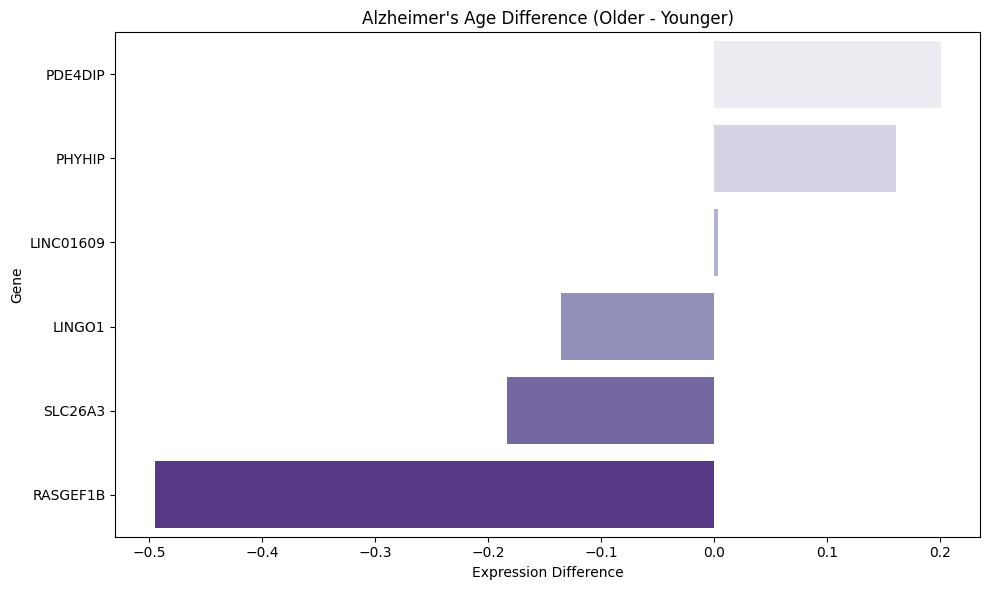

In [ ]:
# Plot 1: AD Age Difference (Older vs Younger within AD)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_disease_comparison_sorted, x='AD_Age_Difference', y='Gene', palette='Purples'
)
plt.title("Alzheimer's Age Difference (Older - Younger)")
plt.xlabel('Expression Difference')
plt.ylabel('Gene')
plt.tight_layout()
plt.show()

<ipython-input-39-d31ceb934c16>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


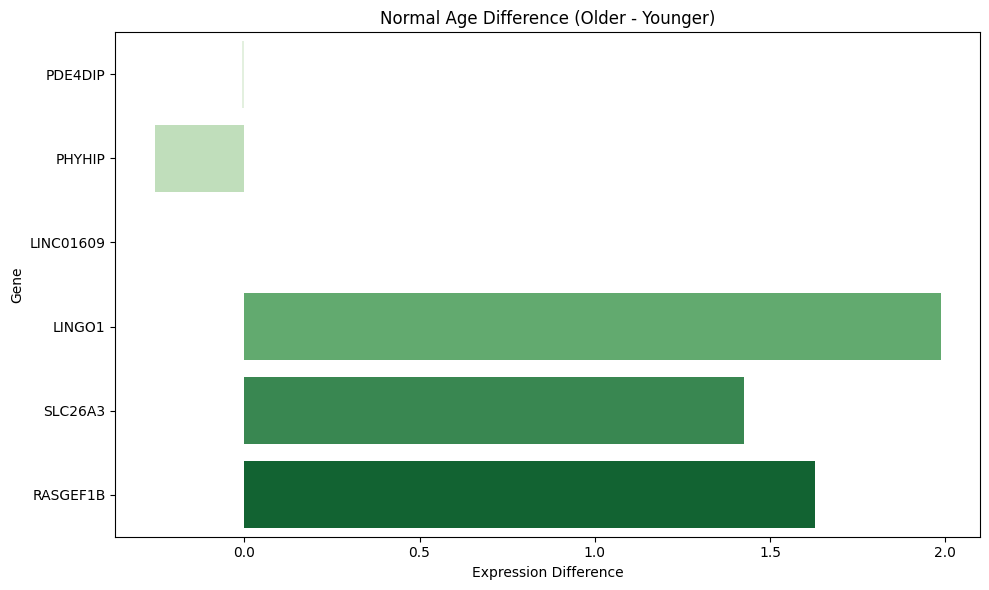

In [39]:
# Plot 2: Normal Age Difference (Older vs Younger within Normal)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_disease_comparison_sorted, x='Normal_Age_Difference', y='Gene', palette='Greens'
)
plt.title('Normal Age Difference (Older - Younger)')
plt.xlabel('Expression Difference')
plt.ylabel('Gene')
plt.tight_layout()
plt.show()

**Age-Related Differences within AD and Normal Groups**

* PDE4DIP shows an increase in expression with age in AD subjects, while in normal subjects, expression is nearly stable across age groups.

* PHYHIP shows a significant increase with age in AD subjects but decreases with age in normal subjects, indicating a potential age-dependent role specific to AD progression.



<ipython-input-40-a28e155dd7fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


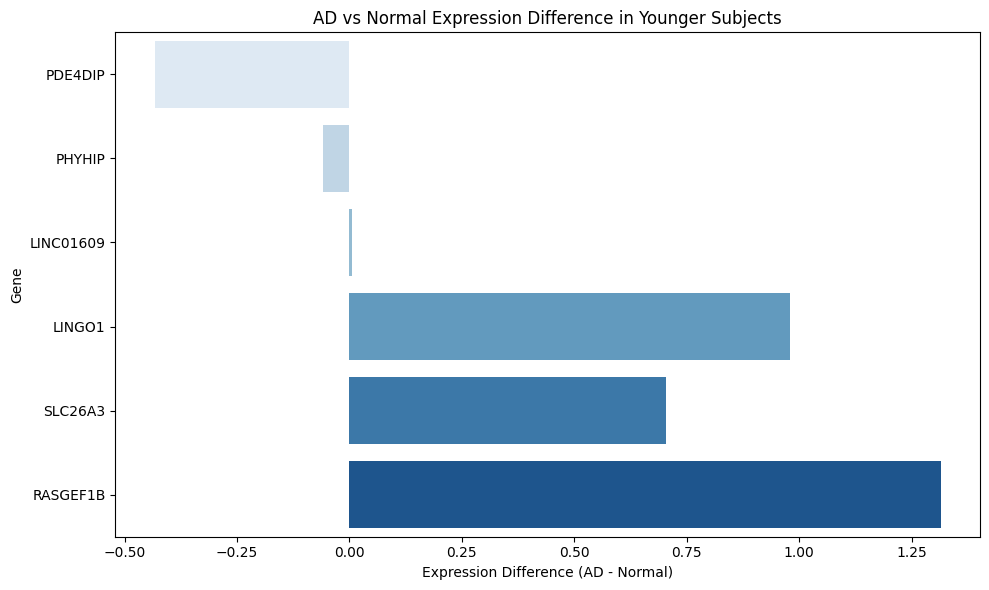

In [40]:
# Plot 3: AD vs Normal in Younger Subjects
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_disease_comparison_sorted, x='AD_Normal_Difference_Younger', y='Gene', palette='Blues'
)
plt.title('AD vs Normal Expression Difference in Younger Subjects')
plt.xlabel('Expression Difference (AD - Normal)')
plt.ylabel('Gene')
plt.tight_layout()
plt.show()

<ipython-input-41-7722ff2d359b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


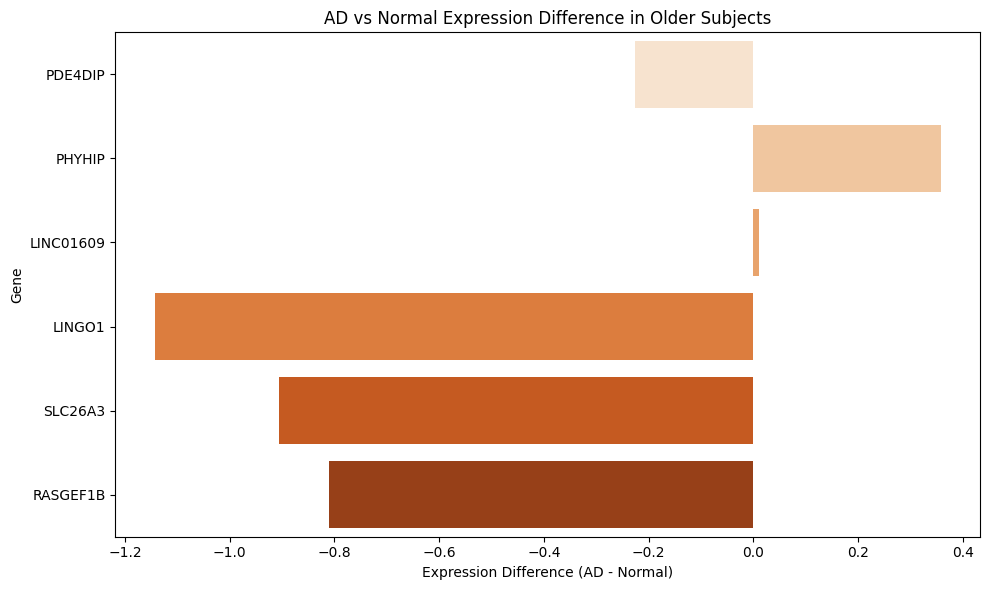

In [41]:
# Plot 4: AD vs Normal in Older Subjects
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_disease_comparison_sorted, x='AD_Normal_Difference_Older', y='Gene', palette='Oranges'
)
plt.title('AD vs Normal Expression Difference in Older Subjects')
plt.xlabel('Expression Difference (AD - Normal)')
plt.ylabel('Gene')
plt.tight_layout()
plt.show()

**Findings:**
Age-dependent reversal of expression patterns in genes between Alzheimer’s Disease (AD) and normal subjects.

**Younger Cohort:** Both LINGO1 and RASGEF1B are significantly upregulated in AD compared to normal subjects, indicating they may play active roles in the early stages of AD pathology.

**Older Cohort:** In older subjects, these genes shift to downregulation in AD, suggesting that as the disease progresses, the mechanisms or roles these genes play in AD pathology might change.

This finding underscores the complexity of AD, where specific genes are not consistently upregulated or downregulated throughout the disease. Instead, they appear to be more actively involved in the early stages of AD and undergo regulatory shifts as individuals age. This age-dependent gene expression shift could provide insight into how AD pathology evolves and highlight potential targets for age-specific therapeutic interventions.

# Gender-Based Analysis

**6. (20%) Experiment with gender cohorts (sex = male vs. female)**

**Write one page about your findings, e.g. what are the differences between male and female subjects. **

In [43]:
# Group by 'sex' and 'disease', count occurrences, and unstack for table format
gender_disease_summary = adata.obs.groupby(['sex', 'disease']).size().unstack(fill_value=0)

# Add a sum row at the bottom
gender_disease_summary.loc['Total'] = gender_disease_summary.sum()

# Display the summary with the sum row
print("Gender distribution summary across disease categories:")
display(gender_disease_summary)


Gender distribution summary across disease categories:


<ipython-input-43-ebf21937ef69>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_disease_summary = adata.obs.groupby(['sex', 'disease']).size().unstack(fill_value=0)


disease,Alzheimer disease,normal
sex,,
female,6796,2729
male,4937,8735
Total,11733,11464


**Findings:**
* Alzheimer’s Prevalence by Gender: Among Alzheimer’s cases, females are notably more prevalent than males, aligning with known trends of higher Alzheimer’s risk in women.
* Implications: The gender differences across disease categories highlight potential sex-specific factors in Alzheimer’s risk, meriting further exploration into genetic or lifestyle contributors.

In [44]:
# Step 1: Filter data by disease and gender group
# Separate by gender and disease: Alzheimer's female and male, normal female and male
female_AD = adata_filtered[(adata_filtered.obs['sex'] == 'female') &
                           (adata_filtered.obs['disease'] == 'Alzheimer disease')]
male_AD = adata_filtered[(adata_filtered.obs['sex'] == 'male') &
                         (adata_filtered.obs['disease'] == 'Alzheimer disease')]
female_normal = adata_filtered[(adata_filtered.obs['sex'] == 'female') &
                               (adata_filtered.obs['disease'] == 'normal')]
male_normal = adata_filtered[(adata_filtered.obs['sex'] == 'male') &
                             (adata_filtered.obs['disease'] == 'normal')]

# Step 2: Calculate average expression for each gene in each combination of gender group and disease
female_AD_avg_expr = np.mean(female_AD.X.toarray(), axis=0)
male_AD_avg_expr = np.mean(male_AD.X.toarray(), axis=0)
female_normal_avg_expr = np.mean(female_normal.X.toarray(), axis=0)
male_normal_avg_expr = np.mean(male_normal.X.toarray(), axis=0)

# Step 3: Create a DataFrame with average expressions for each group and calculate differences
gender_disease_comparison = pd.DataFrame({
    'Gene': adata_filtered.var['feature_name'].tolist(),
    'Female_AD_avg': female_AD_avg_expr,
    'Male_AD_avg': male_AD_avg_expr,
    'Female_Normal_avg': female_normal_avg_expr,
    'Male_Normal_avg': male_normal_avg_expr
})

# Calculate the difference for each comparison
gender_disease_comparison['AD_Gender_Difference'] = gender_disease_comparison['Male_AD_avg'] - gender_disease_comparison['Female_AD_avg']
gender_disease_comparison['Normal_Gender_Difference'] = gender_disease_comparison['Male_Normal_avg'] - gender_disease_comparison['Female_Normal_avg']
gender_disease_comparison['AD_Normal_Difference_Female'] = gender_disease_comparison['Female_AD_avg'] - gender_disease_comparison['Female_Normal_avg']
gender_disease_comparison['AD_Normal_Difference_Male'] = gender_disease_comparison['Male_AD_avg'] - gender_disease_comparison['Male_Normal_avg']

# Step 4: Sort by the difference for Alzheimer's gender comparison
gender_disease_comparison_sorted = gender_disease_comparison.sort_values(by='AD_Gender_Difference', ascending=False)

# Display the sorted DataFrame for interpretation
gender_disease_comparison_sorted


,Gene,Female_AD_avg,Male_AD_avg,Female_Normal_avg,Male_Normal_avg,AD_Gender_Difference,Normal_Gender_Difference,AD_Normal_Difference_Female,AD_Normal_Difference_Male
5,RASGEF1B,0.317910,0.456108,-0.246264,-0.428200,0.138198,-0.181936,0.564174,0.884307
3,LINC01609,0.030007,0.022276,-0.049576,-0.020449,-0.007731,0.029128,0.079583,0.042725
1,LINGO1,0.308195,0.294638,-0.107101,-0.372843,-0.013558,-0.265742,0.415297,0.667481
0,SLC26A3,0.238971,0.211315,-0.075549,-0.281744,-0.027656,-0.206195,0.314520,0.493059
4,PHYHIP,0.092063,-0.042382,-0.077198,-0.023548,-0.134445,0.053650,0.169261,-0.018834
2,PDE4DIP,-0.109549,-0.251567,0.018925,0.221503,-0.142017,0.202578,-0.128474,-0.473070


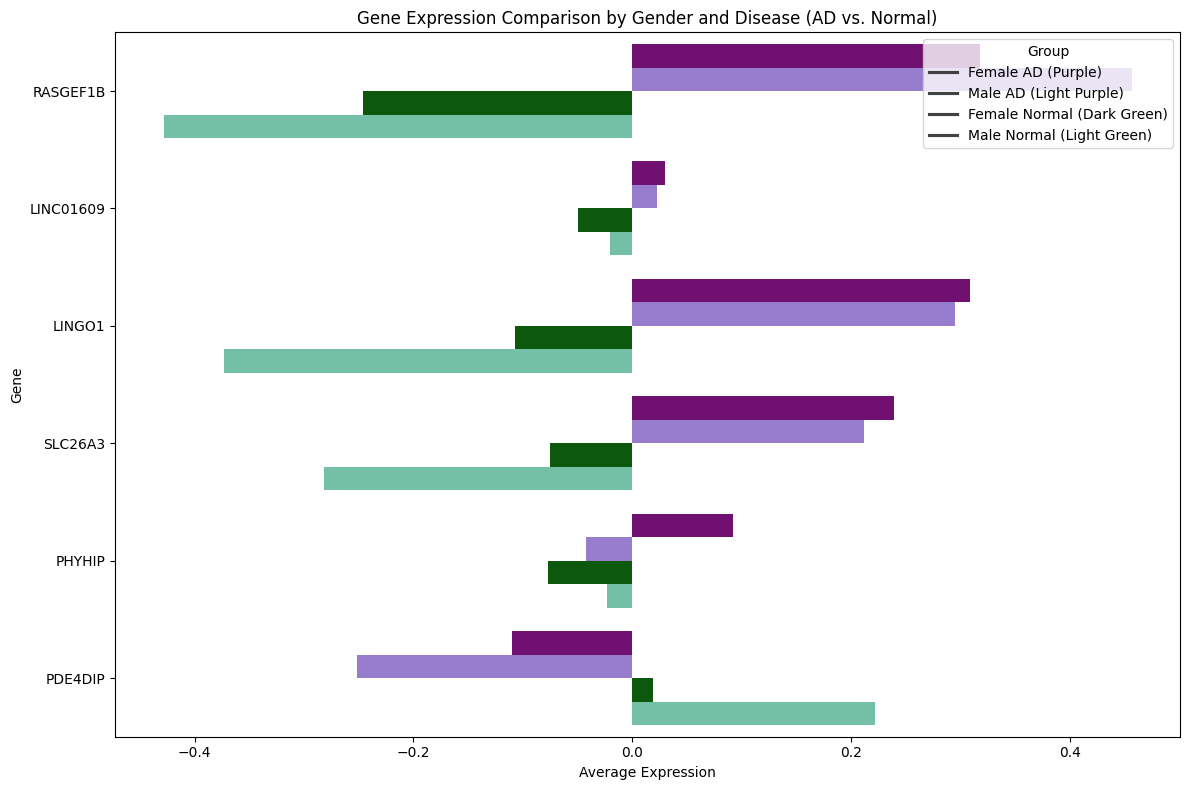

In [46]:
# Melt the DataFrame to reshape it for visualization with Seaborn
melted_data = pd.melt(
    gender_disease_comparison_sorted,
    id_vars=['Gene'],
    value_vars=['Female_AD_avg', 'Male_AD_avg', 'Female_Normal_avg', 'Male_Normal_avg'],
    var_name='Group',
    value_name='Average Expression'
)

# Updated color mapping for AD and Normal groups
group_palette = {
    'Female_AD_avg': '#800080',  # Dark purple for Female AD
    'Male_AD_avg': '#9370DB',    # Light purple for Male AD
    'Female_Normal_avg': '#006400',  # Dark green for Female Normal
    'Male_Normal_avg': '#66CDAA'     # Light green for Male Normal
}

# Plot: Average expression comparison across different gender and disease groups
plt.figure(figsize=(12, 8))
sns.barplot(
    data=melted_data,
    x='Average Expression',
    y='Gene',
    hue='Group',
    palette=group_palette
)
plt.title('Gene Expression Comparison by Gender and Disease (AD vs. Normal)')
plt.xlabel('Average Expression')
plt.ylabel('Gene')
plt.legend(
    title='Group', loc='upper right',
    labels=['Female AD (Purple)', 'Male AD (Light Purple)', 'Female Normal (Dark Green)', 'Male Normal (Light Green)']
)
plt.tight_layout()
plt.show()


**Finding:**

**RASGEF1B:**
* Difference in AD and Normal (Male): Shows a strong distinction with an AD vs. Normal difference of 0.884 in males, suggesting significantly higher expression in AD male subjects compared to normal.
* AD Gender Difference: A slight gender difference within the AD group, with males showing a 0.138 higher expression than females, indicating RASGEF1B might play a gender-specific role in AD pathology.

**PDE4DIP:**

* In contrast to the other genes, PDE4DIP shows a downregulation in AD compared to Normal, with the reduction more noticeable in male subjects.
* This downregulation might suggest a potential protective or structural role of PDE4DIP that is compromised in AD, especially among males.

**PHYHIP:**

* The difference in expression for PHYHIP is less consistent across groups. Interestingly, Female AD subjects have slightly elevated expression compared to Male AD.
* This gene's expression pattern does not show a strong trend, but its role may vary with gender.